# Emissão de $CO_2$ por veículos

O objetivo deste notebook é prever a emissão de $CO_2$ de determinados carros baseados em suas características.

## 1. Dados

Os dados apresentam diferentes modelos de carros, suas características e emissões de gás carbônico:

- Make: Fabricante do carro
- Model: Modelo do carro
- Vehicle Class: Classe do veículo
- Engine Size: Tamanho do motor
- Cylinders: Número de cilíndros
- Transmission: Tipo de transmissão
- Fuel Type: Tipo de Combustível
- Fuel Consumption City (L/100 km): Cosumo de combustível na cidade
- Fuel Consumption Hwy (L/100 km): Cosumo de Combustível na rodovia
- Fuel Consumption Comb (L/100 km: Cosumo de Combustível combinado (55% cidade, 45% rodovia)
- Fuel Consumption Comb (mpg): Cosumo de Combustível combinado (em mpg)
- CO2 Emissions(g/km): Emissão de gás carbônico


### 1.1 Importando as bibliotecas

In [1]:
import numpy as np #operações matemáticas
import pandas as pd #manipulação dos dados
import seaborn as sns #gráficos
import matplotlib.pyplot as plt #gráficos

### 1.2 O conjunto de dados

Importando os dados

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

Visualizando parte do dataframe

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Visualizando algumas informações.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Os dados apresentam 7 colunas numéricas e 5 colunas de texto

Verificando a presença de valores nulos

In [5]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Verificando algumas estatísticas acerca dos dados

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


A coluna de emissão apresenta alguns valores discrepantes (outliers), para verificá-los, é possível fazer um boxplot:

<AxesSubplot:xlabel='CO2 Emissions(g/km)'>

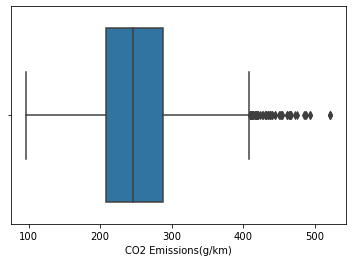

In [7]:
sns.boxplot(data=df, x=df.columns[11])

Para este dataset, escolheremos apenas valores menores que 450 g/km para evitar muitos outliers.

In [8]:
(df[df.columns[11]] < 450).value_counts() #verificando a quantidade de valores nesse intervalo

True     7362
False      23
Name: CO2 Emissions(g/km), dtype: int64

Gerando o novo dataset:

In [9]:
df = df[df[df.columns[11]] < 450]

Fazendo novamente o boxplot:

<AxesSubplot:xlabel='CO2 Emissions(g/km)'>

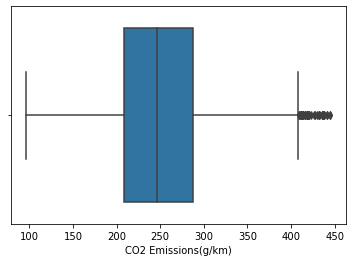

In [10]:
sns.boxplot(data=df, x=df.columns[11])

Os outliers muito discrepantes foram removidos!

## 2. Análise Exploratória de Dados

Para analisar os dados, é necessário verificar a influência de cada atributo nas emissões

### 2.1 Marca

Fabricante dos carros

Aqui são mostradas as diferentes marcas contidas no dataset

In [11]:
df['Make'].value_counts()

FORD             627
CHEVROLET        587
BMW              527
MERCEDES-BENZ    416
PORSCHE          376
TOYOTA           330
GMC              327
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      46
BENTLEY           45
ALFA ROMEO        30
LAMBORGHINI       29
GENESIS           25
SCION             22
SMART              7
SRT                2
Name: Make, dtype: int64

Agora, as marcas serão ordenadas por média de emissão de gás carbônico:

In [12]:
df.groupby(df.columns[0]).mean()[df.columns[11]].sort_values(ascending=False)

Make
SRT              389.000000
ROLLS-ROYCE      388.480000
LAMBORGHINI      372.793103
BENTLEY          360.666667
ASTON MARTIN     337.217391
MASERATI         318.147541
GMC              299.412844
RAM              292.402062
LAND ROVER       287.647059
GENESIS          284.840000
DODGE            276.361789
MERCEDES-BENZ    275.983173
JAGUAR           267.987500
LINCOLN          267.302083
CADILLAC         265.854430
CHEVROLET        264.005111
FORD             260.626794
PORSCHE          258.941489
INFINITI         254.064815
BMW              254.007590
AUDI             250.846154
JEEP             250.342629
CHRYSLER         246.170455
LEXUS            241.112360
NISSAN           236.864865
BUICK            233.058252
VOLVO            230.056452
ALFA ROMEO       224.900000
TOYOTA           224.424242
ACURA            223.652778
SUBARU           217.614286
KIA              214.294372
VOLKSWAGEN       209.335025
HYUNDAI          208.871429
MITSUBISHI       200.505263
SCION          

Visualizando isto graficamente, temos os 5 maiores e os 5 menores emissores:

Text(0.5, 0, 'CO2 Emissions (g/km)')

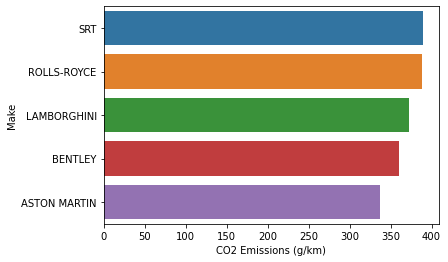

In [13]:
sns.barplot(x=df.groupby(df.columns[0]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(5).values,
            y=df.groupby(df.columns[0]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(5).index)
plt.xlabel('CO2 Emissions (g/km)')

Text(0.5, 0, 'CO2 Emissions (g/km)')

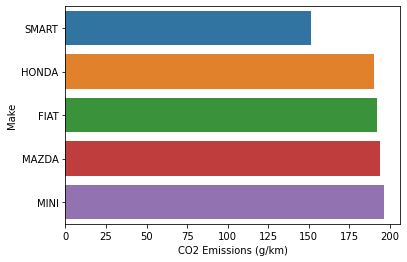

In [14]:
sns.barplot(x=df.groupby(df.columns[0]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(5).values,
            y=df.groupby(df.columns[0]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(5).index)
plt.xlabel('CO2 Emissions (g/km)')

### 2.2 Modelo

Modelo dos carros

Em procedimento análogo ao anterior, verificaremos os modelos mais emissores e menos emissores:

In [15]:
df['Model'].value_counts()

F-150 FFV              32
F-150 FFV 4X4          32
MUSTANG                27
FOCUS FFV              24
F-150 4X4              20
                       ..
PANAMERA 4S ST          1
PANAMERA TURBO ST       1
WRX STI AWD TYPE RA     1
CAMRY LE/SE             1
XC40 T4 AWD             1
Name: Model, Length: 2042, dtype: int64

Text(0.5, 0, 'CO2 Emissions (g/km)')

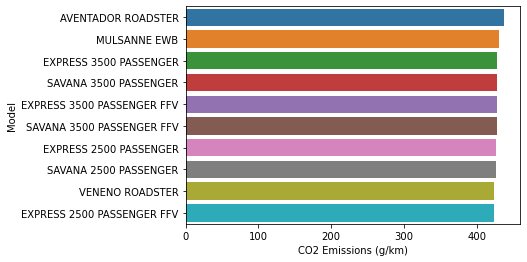

In [16]:
sns.barplot(x=df.groupby(df.columns[1]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(10).values,
            y=df.groupby(df.columns[1]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(10).index)
plt.xlabel('CO2 Emissions (g/km)')

Text(0.5, 0, 'CO2 Emissions (g/km)')

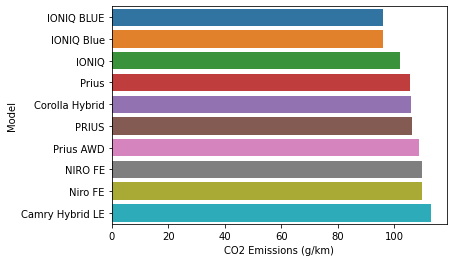

In [17]:
sns.barplot(x=df.groupby(df.columns[1]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(10).values,
            y=df.groupby(df.columns[1]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(10).index)
plt.xlabel('CO2 Emissions (g/km)')

### 2.3 Classe dos veículos

Novamente, verificaremos os maiores e menores emissores, agora, por classe de veículo (como SUV, compacto, caminhonete, entre outros)

In [18]:
df['Vehicle Class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1132
COMPACT                     1022
SUV - STANDARD               732
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   444
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               63
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

Text(0.5, 0, 'CO2 Emissions (g/km)')

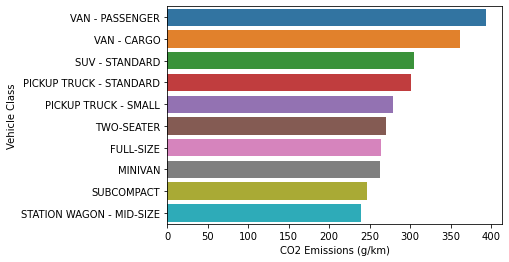

In [19]:
sns.barplot(x=df.groupby(df.columns[2]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(10).values,
            y=df.groupby(df.columns[2]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(10).index)
plt.xlabel('CO2 Emissions (g/km)')

Text(0.5, 0, 'CO2 Emissions (g/km)')

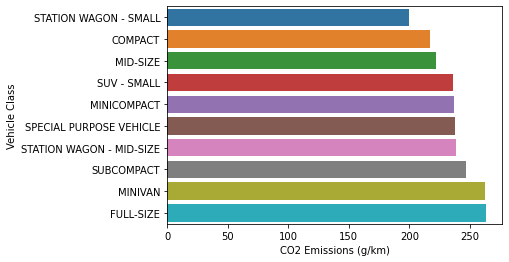

In [20]:
sns.barplot(x=df.groupby(df.columns[2]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(10).values,
            y=df.groupby(df.columns[2]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(10).index)
plt.xlabel('CO2 Emissions (g/km)')

### 2.4 Tamanho do motor

Agora, será verificada a influência do tamanho do motor:

In [21]:
df[df.columns[3]].value_counts()

2.0    1460
3.0     804
3.6     536
3.5     529
2.5     423
2.4     346
1.6     302
5.3     290
1.8     216
1.4     211
5.0     207
1.5     207
4.0     198
6.2     162
4.4     131
5.7     116
3.8     114
3.7     112
2.7      99
6.0      88
3.3      85
4.7      78
3.4      52
5.5      52
4.3      52
2.3      51
5.2      48
6.4      46
5.6      36
3.2      35
4.8      32
4.6      32
6.6      29
1.2      25
6.7      25
2.8      24
2.9      23
1.0      18
4.2      14
1.3      11
5.4       8
6.8       6
6.5       6
2.1       5
8.4       5
5.9       5
6.3       3
0.9       3
5.8       1
2.2       1
Name: Engine Size(L), dtype: int64

Text(0.5, 0, 'CO2 Emissions (g/km)')

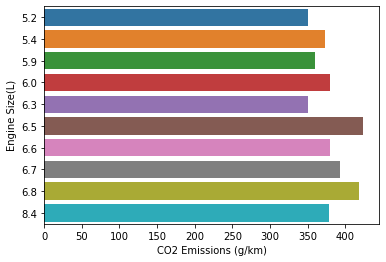

In [22]:
sns.barplot(x=df.groupby(df.columns[3]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(10).values,
            y=df.groupby(df.columns[3]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(10).index,
            orient='h')
plt.xlabel('CO2 Emissions (g/km)')

Text(0.5, 0, 'CO2 Emissions (g/km)')

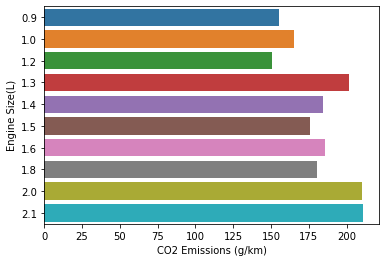

In [23]:
sns.barplot(x=df.groupby(df.columns[3]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(10).values,
            y=df.groupby(df.columns[3]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(10).index,
            orient='h')
plt.xlabel('CO2 Emissions (g/km)')

É notável a relação linear entre a emissão e o tamanho do motor. A proporcionalidade é observada no gráfico a seguir:

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Engine Size(L)'>

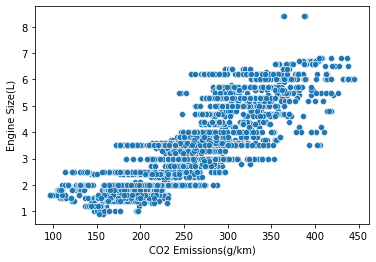

In [24]:
sns.scatterplot(x=df[df.columns[11]],y=df[df.columns[3]])

Quanto maior o motor, maior sua emissão.

### 2.5 Número de cilíndros

In [25]:
df[df.columns[4]].value_counts()

4     3220
6     2446
8     1399
12     135
3       95
10      41
5       26
Name: Cylinders, dtype: int64

Text(0.5, 0, 'CO2 Emissions (g/km)')

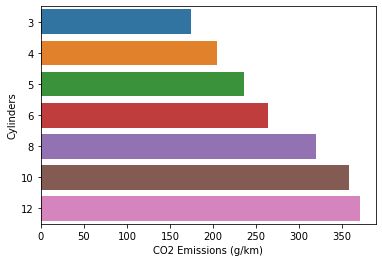

In [26]:
sns.barplot(x=df.groupby(df.columns[4]).mean()[df.columns[11]].sort_values(ascending=False).values,
            y=df.groupby(df.columns[4]).mean()[df.columns[11]].sort_values(ascending=False).index,
            orient='h')
plt.xlabel('CO2 Emissions (g/km)')

Novamente é observada a relação linear entre as grandezas.

### 2.6 Tipo de Transmissão

Desta vez, serão avaliados os diferentes tipo de transmissão dos automóveis:

- A: automatic
- AM: automated manual
- AS: automatic with select shift
- AV: continuously variable
- M: manual

Os números de 3 a 10 após os tipos de transmissão indicam o número de engrenagens presentes.

In [27]:
df[df.columns[5]].value_counts()

AS6     1324
AS8     1210
M6       901
A6       787
A8       490
AM7      430
A9       339
AS7      317
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        90
A5        83
AS9       77
A4        65
AM8       62
A7        52
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

Text(0.5, 0, 'CO2 Emissions (g/km)')

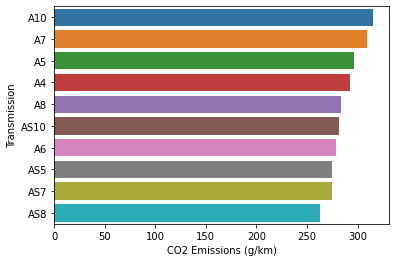

In [28]:
sns.barplot(x=df.groupby(df.columns[5]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(10).values,
            y=df.groupby(df.columns[5]).mean()[df.columns[11]].sort_values(ascending=False).nlargest(10).index)
plt.xlabel('CO2 Emissions (g/km)')

É notável a maior influência das transmissões automáticas A e AS

Text(0.5, 0, 'CO2 Emissions (g/km)')

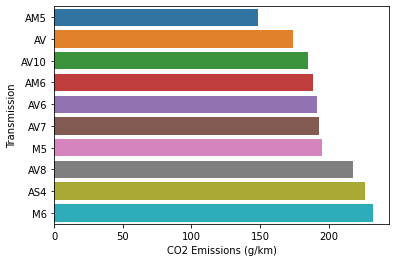

In [29]:
sns.barplot(x=df.groupby(df.columns[5]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(10).values,
            y=df.groupby(df.columns[5]).mean()[df.columns[11]].sort_values(ascending=True).nsmallest(10).index)
plt.xlabel('CO2 Emissions (g/km)')

As transmissões automáticas do tipo AM e AV geram menos emissões que as demais.

### 2.7 Tipo de Combustível

Para este caso, teremos a seguinte legenda:

- X: regular gasoline
- Z: premium gasoline
- D: diesel
- E: ethanol (E85)
- N: natural gas

In [30]:
df[df.columns[6]].value_counts()

X    3634
Z    3182
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

Text(0.5, 0, 'CO2 Emissions (g/km)')

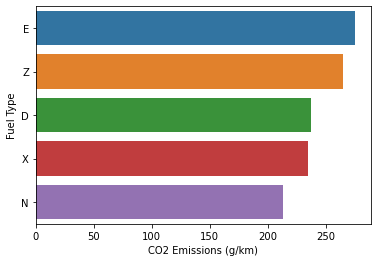

In [31]:
sns.barplot(x=df.groupby(df.columns[6]).mean()[df.columns[11]].sort_values(ascending=False).values,
            y=df.groupby(df.columns[6]).mean()[df.columns[11]].sort_values(ascending=False).index)
plt.xlabel('CO2 Emissions (g/km)')

Mudando para a legenda indicada:

Text(0.5, 0, 'CO2 Emissions (g/km)')

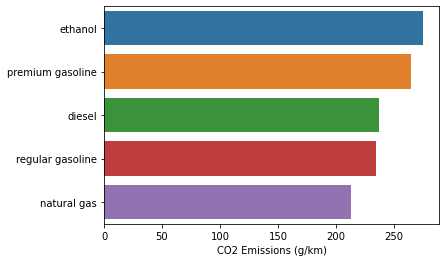

In [32]:
sns.barplot(x=df.groupby(df.columns[6]).mean()[df.columns[11]].sort_values(ascending=False).values,
            y=['ethanol', 'premium gasoline', 'diesel', 'regular gasoline', 'natural gas'])
plt.xlabel('CO2 Emissions (g/km)')

Os carros movidos a etanol apresentam maior emissão quando comparados aos demais.

### 2.8 Consumo de Combustível

Por fim, verificando a relação entre o consumo de combustível em cada situação, é evidente que as emissões crescem linearmente com o consumo de combustível em L/100km.

Para a medida em mpg (miles per imperial gallon), é observado um decaimento, uma vez que as unidades de volume (gallons) e distância (miles) estão invertidas neste caso.

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption City (L/100 km)'>

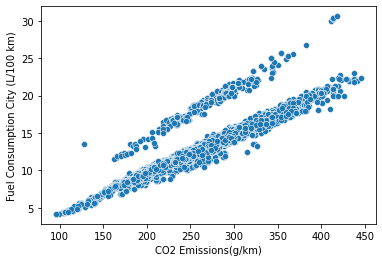

In [33]:
sns.scatterplot(x=df[df.columns[11]],y=df[df.columns[7]])

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Hwy (L/100 km)'>

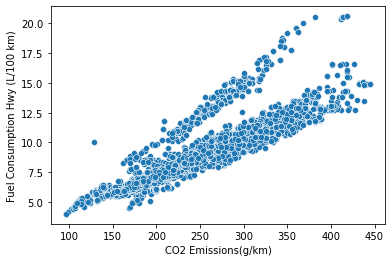

In [34]:
sns.scatterplot(x=df[df.columns[11]],y=df[df.columns[8]])

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb (L/100 km)'>

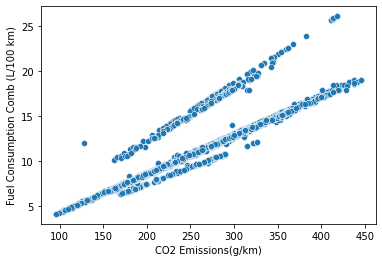

In [35]:
sns.scatterplot(x=df[df.columns[11]],y=df[df.columns[9]])

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb (mpg)'>

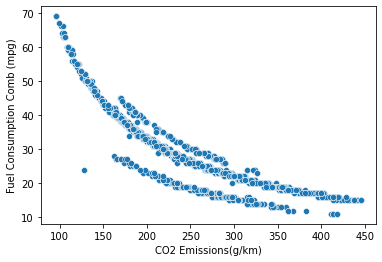

In [36]:
sns.scatterplot(x=df[df.columns[11]],y=df[df.columns[10]])

### 2.8 Correlações

A correlação entre as grandezas numéricas e a emissão de gás carbônico indica o quão proporcionais elas são

In [37]:
df.corr()[df.columns[11]].sort_values()

Fuel Consumption Comb (mpg)        -0.911078
Cylinders                           0.826704
Engine Size(L)                      0.848935
Fuel Consumption Hwy (L/100 km)     0.880682
Fuel Consumption Comb (L/100 km)    0.915125
Fuel Consumption City (L/100 km)    0.916504
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

Todas as grandezas apresentam forte contribuição para a emissão de $CO_2$

Para facilitar as manipulações, a coluna de modelos de carro será descartada:

In [38]:
df = df.drop(df.columns[1], axis=1)
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Além disso, a coluna de consumo de combustível em mpg também será descartada, já que é uma grandeza duplicada, estando apenas em outra unidade de medida.

In [39]:
df = df.drop(df.columns[9], axis=1)

Agora, será gerado um novo dataset considerando os atributos das colunas não numéricas como binárias (0 ou 1)

In [40]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,196,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,221,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,136,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,255,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,244,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Observando as correlações dessa nova tabela:

In [41]:
df_dummies.corr()[df_dummies.columns[5]].sort_values().nlargest(10)

CO2 Emissions(g/km)                      1.000000
Fuel Consumption City (L/100 km)         0.916504
Fuel Consumption Comb (L/100 km)         0.915125
Fuel Consumption Hwy (L/100 km)          0.880682
Engine Size(L)                           0.848935
Cylinders                                0.826704
Vehicle Class_SUV - STANDARD             0.315152
Vehicle Class_PICKUP TRUCK - STANDARD    0.253365
Vehicle Class_VAN - PASSENGER            0.233384
Fuel Type_Z                              0.226322
Name: CO2 Emissions(g/km), dtype: float64

In [42]:
df_dummies.corr()[df_dummies.columns[5]].sort_values().nsmallest(10)

Transmission_AV                       -0.271960
Fuel Type_X                           -0.258118
Vehicle Class_COMPACT                 -0.232983
Vehicle Class_MID-SIZE                -0.205919
Make_HONDA                            -0.180418
Vehicle Class_STATION WAGON - SMALL   -0.163903
Make_MINI                             -0.157239
Transmission_M5                       -0.156338
Make_MAZDA                            -0.155522
Transmission_AM6                      -0.145757
Name: CO2 Emissions(g/km), dtype: float64

## 3. Previsões (Machine Learning)

A partir do novo dataset, serão definidos os previsores (X) e os valores a serem determinados (y):

In [43]:
X = df_dummies.drop('CO2 Emissions(g/km)', axis=1)
X.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
y = df_dummies['CO2 Emissions(g/km)']

In [45]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7362, dtype: int64

### 3.1 Separando as bases de treinamento e teste

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
len(X_train), len(X_test), len(y_train), len(y_test)

(5521, 1841, 5521, 1841)

### 3.2 Escalonando as bases

Será utilizado o MinMaxScaler para que os dados sejam padronizados numa mesma ordem de grandeza.

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3.3 Regressão Linear

Finalmente, será feita a regressão para que os valores possam ser determinados!

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
reg = LinearRegression() #Criação do modelo

In [52]:
reg.fit(X_train, y_train) #fitando o modelo na base de treinamento

LinearRegression()

In [53]:
y_pred = reg.predict(X_test) #predições da base de teste

In [54]:
y_pred

array([226.80615234, 189.94482422, 233.64257812, ..., 160.59082031,
       302.07226562, 247.09619141])

#### Métricas de avaliação do modelo

Para observar os erros nas predições, serão utilizadas algumas métricas:

**Mean Absolute Error** (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos quadrados dos erros:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos quadrados dos erros:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

OBS: $y_i$ são os valores reais e $\hat{y}_i$ são os valores gerados pela predição.

Comparando:

- **MAE** é a mais fácil de entender, já que trata-se apenas do erro absoluto.
- **MSE** 'pune' valores maiores de erro por conta da elevação ao quadrado.
- **RMSE** é a mais interpretável quando comparado à ordem de grandeza dos valores a serem determinados.

No fim das contas, o objetivo é minimizar estes erros.


In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [57]:
MAE, MSE, RMSE

(2991056491.481327, 1.6470357227890698e+22, 128336889583.2009)

#### Erros muito grandes!

Nota-se que o modelo de Regressão Linear não é o mais adequado para esta base de dados.

### 3.4 Random Forest Regressor

Para dados que não funcionam bem com modelos lineares, pode-se escolher algum tipo de regressor não-linear, como o das florestas randômicas (Random Forest)

In [58]:
from sklearn.ensemble import RandomForestRegressor

Serão testados diferentes hiperparâmetros analisando as métricas de erro citadas anteriormente

In [59]:
for i in [10, 50, 100, 150, 200]:
    model = RandomForestRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    print(MAE, MSE, RMSE)

1.760251975979841 10.264405176020192 3.2038110393748553
1.757336041417551 10.516440484266525 3.2429061787641227
1.7320822320424003 10.02819554395131 3.1667326290596924
1.7291686424735002 9.964013466138331 3.1565825612738743
1.7424436529573466 10.29724435059391 3.2089319641578427


#### Muito melhor!

O modelo de regressão por Random Forest se saiu muito melhor nestes dados!

Por fim, escolhendo o parâmetro de 150 'estimadores'

In [60]:
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(MAE, MSE, RMSE)

1.7311611716809243 10.082377236340868 3.1752759307406446


#### Outra métrica

Uma forma de avaliar o quanto os valores obtidos variaram em relação aos valores da base de teste é através da CONCORDÂNCIA.

$$ Concordância (\%) = 100* \left(1 - \frac{|y_{teste} - y_{pred}|}{y_{teste}}\right) $$

Esta grandeza mostra qual é a porcentagem do valor obtido pelo modelo em relação ao valor real (% de acerto)

In [61]:
conc = 100*(1 - abs(y_test.values - y_pred)/y_test)

In [62]:
conc.min(), conc.max(), conc.mean()

(62.344287949921764, 100.0, 99.28726040525765)

O modelo de regressão de Random Forest apresentou uma concordância média de 99.3% com os valores reais.

## 4. Conclusão

Para este conjunto de dados, foi necessária a utilização de um modelo de regressão não-linear (Random Forest Regressor).

Assim, as predições obtiveram erros muito menores quando comparados ao modelo de regressão linear.